# Credit Card Default Prediction - EDA and Modeling

In [154]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import logging
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [155]:
# Ignore warnings
warnings.filterwarnings('ignore')

In [156]:
# Setup logging
os.makedirs('logs', exist_ok=True)
logging.basicConfig(filename='logs/app.log',
                    level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')
logging.info("📁 Logging has started.")

In [157]:
# Load dataset
df = pd.read_csv(r"C:\Users\Sanskruti\OneDrive\Desktop\credit_card_default_prediction\data\UCI_Credit_Card.csv")
print(df.head())
logging.info("✅ Dataset loaded successfully.")
logging.info(f"✅ Dataset shape: {df.shape}")

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [158]:
# Rename target column for ease
df.rename(columns={'default.payment.next.month': 'target'}, inplace=True)
logging.info("✅ Target column renamed to 'target'.")

In [159]:
# Rename target column for ease
df.rename(columns={'default.payment.next.month': 'target'}, inplace=True)
logging.info("✅ Renamed column 'default.payment.next.month' to 'target'.")

In [160]:
# Check for null values
df.isnull().sum()


ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
target       0
dtype: int64

In [161]:
# Basic EDA
df.describe()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


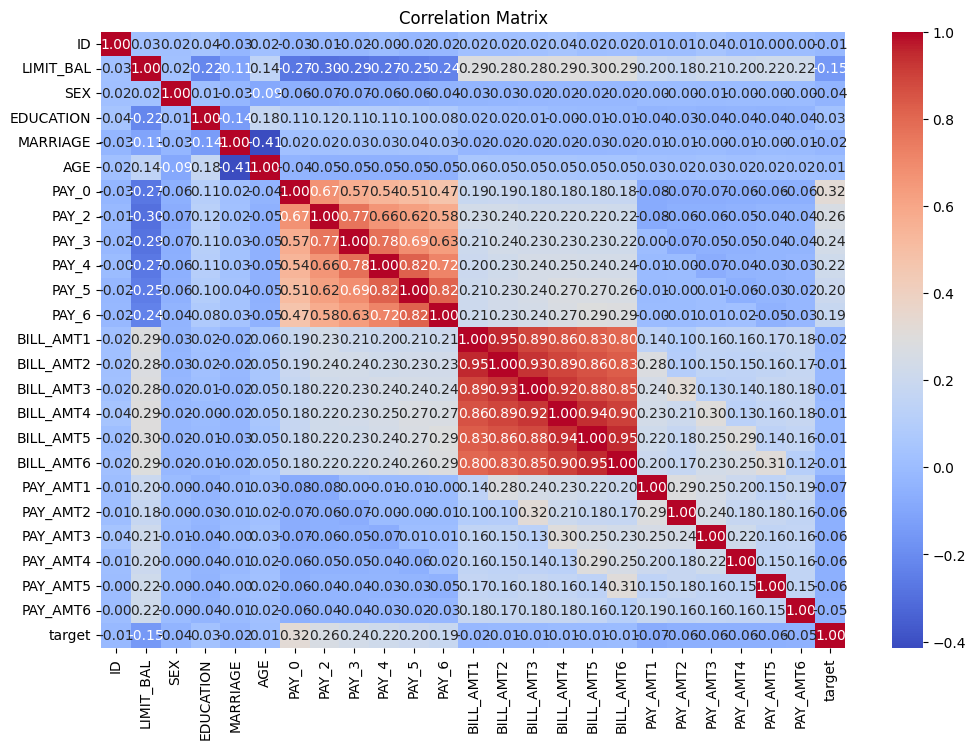

In [162]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
logging.info("✅ Correlation matrix heatmap generated and displayed.")

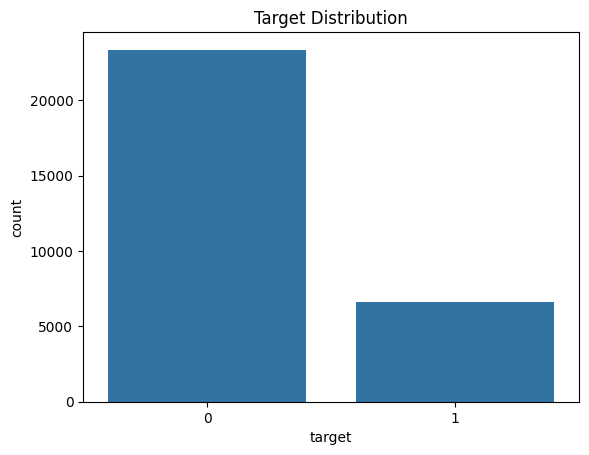

In [163]:
# Visualize target distribution
sns.countplot(x='target', data=df)
plt.title('Target Distribution')
plt.show()
logging.info("✅ Target distribution countplot displayed.")

In [164]:
# Split features and target
X = df.drop(['ID', 'target'], axis=1)  # Remove ID column if exists
y = df['target']
logging.info("✅ Features and target split. Dropped 'ID' and 'target' from feature set.")

In [165]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
logging.info("✅ Performed train-test split with 80% training and 20% testing data using stratification.")
logging.info(f"✅ Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

In [166]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logging.info("✅ Feature scaling completed using StandardScaler.")

In [167]:
# Dictionary to hold models and their names
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}
logging.info("✅ Initialized all ML models: Logistic Regression, Decision Tree, Random Forest, SVM, KNN, XGBoost.")

In [168]:
results_list = []

# Train, predict and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results_list.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

results = pd.DataFrame(results_list)
logging.info("✅ Created results DataFrame for all models.")


In [169]:
# Show results
print(results)
logging.info("✅ Displayed the results DataFrame:\n%s", results.to_string(index=False))


                    Model  Accuracy  Precision    Recall  F1-Score
0     Logistic Regression  0.807667   0.686825  0.239638  0.355307
1           Decision Tree  0.715167   0.370421  0.411454  0.389861
2           Random Forest  0.811667   0.630810  0.357950  0.456731
3  Support Vector Machine  0.816000   0.665185  0.338357  0.448551
4     K-Nearest Neighbors  0.792833   0.548724  0.356443  0.432161
5                 XGBoost  0.811833   0.628906  0.363979  0.461098


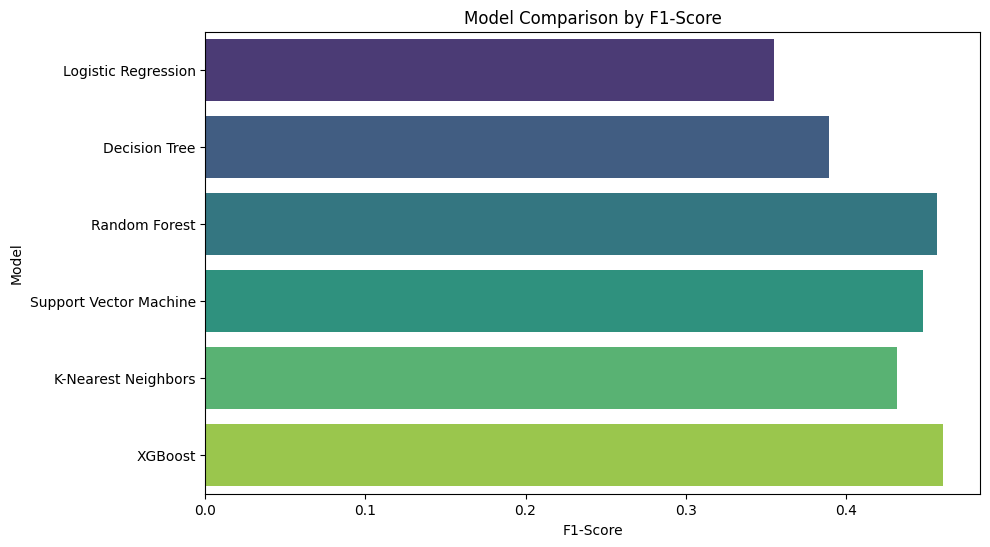

In [170]:
# Plot the comparison
plt.figure(figsize=(10,6))
sns.barplot(x='F1-Score', y='Model', data=results, palette='viridis')
plt.title('Model Comparison by F1-Score')
plt.xlabel('F1-Score')
plt.ylabel('Model')
plt.show()

logging.info("✅ Displayed bar plot for model comparison by F1-Score.")

In [171]:
# Print classification report for best model (XGBoost)
best_model = models['XGBoost']
y_pred_best = best_model.predict(X_test_scaled)
logging.info("✅ Generated predictions using the best model (XGBoost).")

In [172]:
print("Classification Report for XGBoost:\n")
report = classification_report(y_test, y_pred_best)
print(report)
logging.info(f"Classification Report for XGBoost:\n{report}")

Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



In [173]:
best_model = models['XGBoost']
y_pred_best = best_model.predict(X_test_scaled)

print("Classification Report for XGBoost:\n")
report = classification_report(y_test, y_pred_best)
print(report)
logging.info(f"Classification Report for XGBoost:\n{report}")

# === Save model and scaler ===
import pickle
import os

os.makedirs('artifacts', exist_ok=True)

with open('C:/Users/Sanskruti/OneDrive/Desktop/credit_card_default_prediction/notebooks/artifacts/model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)
logging.info("✅ Best model (XGBoost) saved as 'artifacts/model.pkl'.")

with open('C:/Users/Sanskruti/OneDrive/Desktop/credit_card_default_prediction/notebooks/artifacts/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
logging.info("✅ Scaler saved as 'artifacts/scaler.pkl'.")

print("✅ Model and scaler have been saved in the 'artifacts' folder as 'model.pkl' and 'scaler.pkl'.")


Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000

✅ Model and scaler have been saved in the 'artifacts' folder as 'model.pkl' and 'scaler.pkl'.
